# Sample EKG Processing Using Neurokit

Let's load some dependencies

In [1]:
# Load NeuroKit and other useful packages (https://github.com/neuropsychology/NeuroKit)
import neurokit2 as nk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = [8, 5]  # Bigger images

Load sample EKG data.

In [2]:
# one of the built in datasets in the package
ekg_signal = nk.data(dataset="ecg_3000hz")['ECG']

Extract R-peak locations.

In [3]:
# use ecg_peaks() function
_, rpeaks = nk.ecg_peaks(ekg_signal, sampling_rate=3000)

Visualize EKG signal

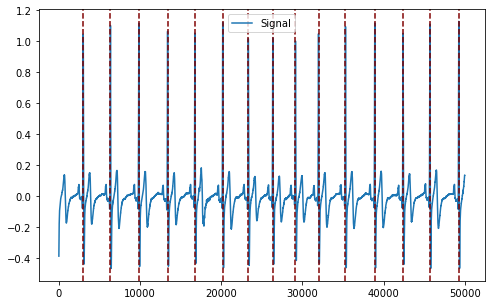

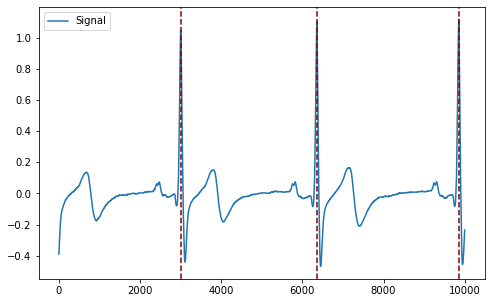

In [29]:
# Visualize R-peaks
plot = nk.events_plot(rpeaks['ECG_R_Peaks'], ekg_signal, color = 'maroon')

# Zoom into the first 3 R-peaks
plot = nk.events_plot(rpeaks['ECG_R_Peaks'][:3], ekg_signal[:10000], color = 'maroon')

Peak detection method

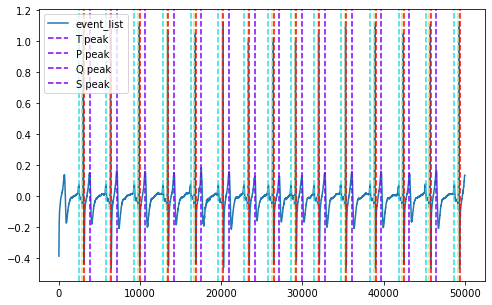

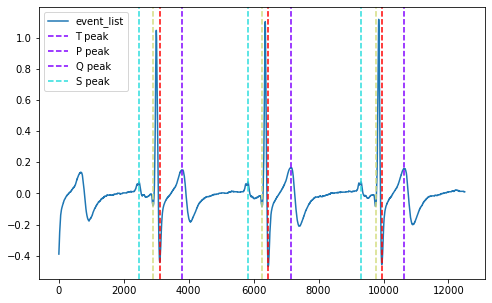

In [5]:
# Delineate the ECG signal
_, waves_peak = nk.ecg_delineate(ekg_signal, rpeaks, sampling_rate=3000, method="peak")

# Visualize the T-peaks, P-peaks, Q-peaks and S-peaks
plot = nk.events_plot([waves_peak['ECG_T_Peaks'],
                       waves_peak['ECG_P_Peaks'],
                       waves_peak['ECG_Q_Peaks'],
                       waves_peak['ECG_S_Peaks']], ekg_signal)
plt.legend(labels= ['event_list','T peak', 'P peak', 'Q peak', 'S peak'])

# Zoom into the first 3 R-peaks, with focus on T_peaks, P-peaks, Q-peaks and S-peaks
plot = nk.events_plot([waves_peak['ECG_T_Peaks'][:3],
                       waves_peak['ECG_P_Peaks'][:3],
                       waves_peak['ECG_Q_Peaks'][:3],
                       waves_peak['ECG_S_Peaks'][:3]], ekg_signal[:12500])
plt.legend(labels= ['event_list','T peak', 'P peak', 'Q peak', 'S peak'])

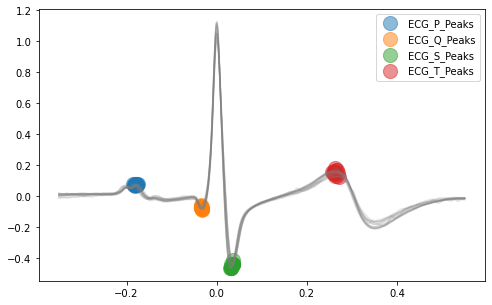

In [6]:
# Delineate the ECG signal and visualize all peaks of ECG complexes
_, waves_peak = nk.ecg_delineate(ekg_signal, rpeaks, sampling_rate=3000, method="peak", show=True, show_type='peaks')

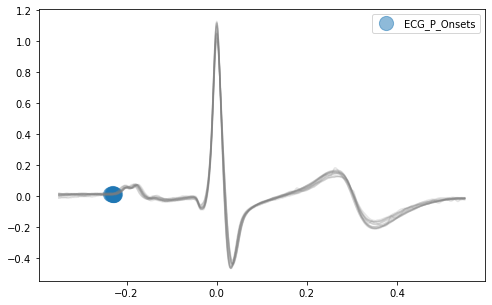

In [7]:
# Delineate the ECG signal and visualizing all P-peaks boundaries
signal_peak, waves_peak = nk.ecg_delineate(ekg_signal, rpeaks, sampling_rate=3000, method="peak", show=True, show_type='bounds_P')

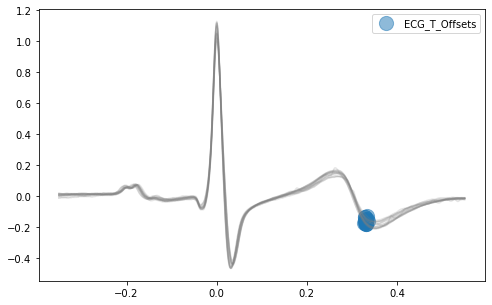

In [8]:
# Delineate the ECG signal and visualizing all T-peaks boundaries
signal_peaj, waves_peak = nk.ecg_delineate(ekg_signal, rpeaks, sampling_rate=3000, method="peak", show=True, show_type='bounds_T')

Continuous Wavelet Method

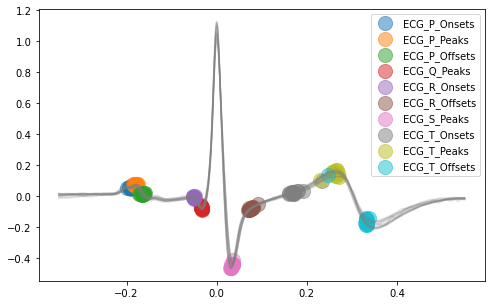

In [9]:
# Delineate the ECG signal
signal_cwt, waves_cwt = nk.ecg_delineate(ekg_signal, rpeaks, sampling_rate=3000, method="cwt", show=True, show_type='all')

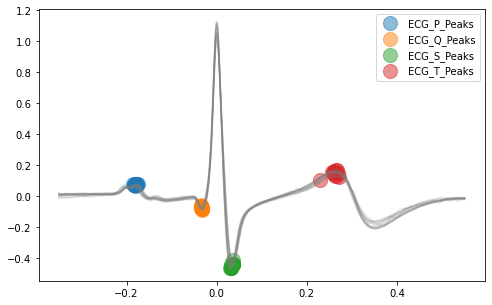

In [10]:
# Visualize P-peaks and T-peaks
signal_cwt, waves_cwt = nk.ecg_delineate(ekg_signal, rpeaks, sampling_rate=3000, method="cwt", show=True, show_type='peaks')

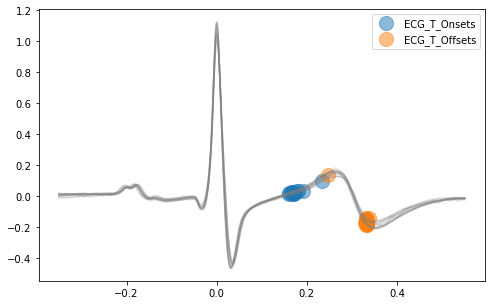

In [11]:
# Visualize T-waves boundaries
signal_cwt, waves_cwt = nk.ecg_delineate(ekg_signal, rpeaks, sampling_rate=3000, method="cwt", show=True, show_type='bounds_T')

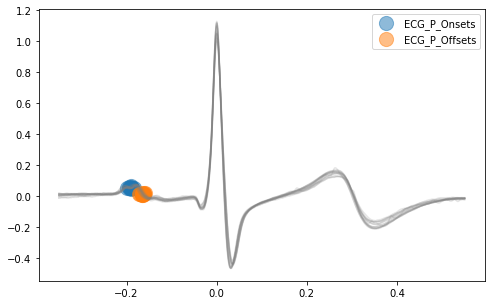

In [12]:
# Visualize P-waves boundaries
signal_cwt, waves_cwt = nk.ecg_delineate(ekg_signal, rpeaks, sampling_rate=3000, method="cwt", show=True, show_type='bounds_P')

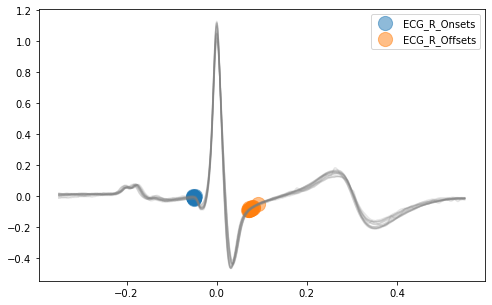

In [13]:
# Visualize R-waves boundaries
signal_cwt, waves_cwt = nk.ecg_delineate(ekg_signal, rpeaks, sampling_rate=3000, method="cwt", show=True, show_type='bounds_R')

Discrete Wavelet method

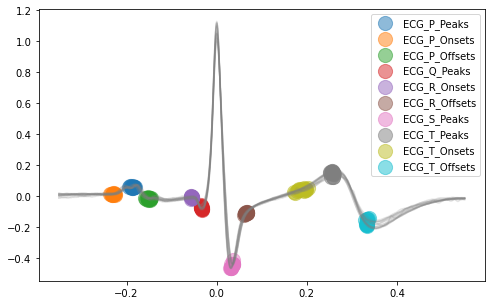

In [37]:
# Delineate the ECG signal
signal_dwt, waves_dwt = nk.ecg_delineate(ekg_signal, rpeaks, sampling_rate=3000, method="dwt", show=True, show_type='all')

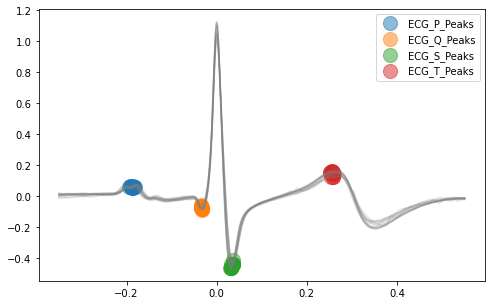

In [14]:
# Visualize P-peaks and T-peaks
signal_dwt, waves_dwt = nk.ecg_delineate(ekg_signal, rpeaks, sampling_rate=3000, method="dwt", show=True, show_type='peaks')

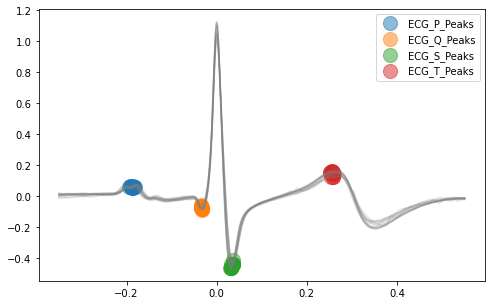

In [15]:
# Visualize P-peaks and T-peaks
signal_dwt, waves_dwt = nk.ecg_delineate(ekg_signal, rpeaks, sampling_rate=3000, method="dwt", show=True, show_type='peaks')

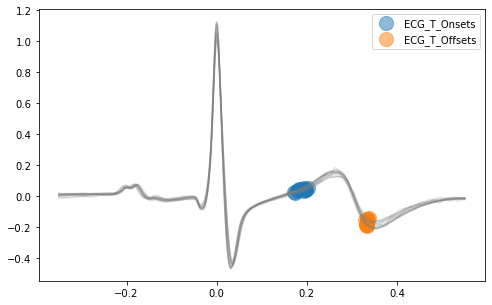

In [16]:
# visualize T-wave boundaries
signal_dwt, waves_dwt = nk.ecg_delineate(ekg_signal, rpeaks, sampling_rate=3000, method="dwt", show=True, show_type='bounds_T')

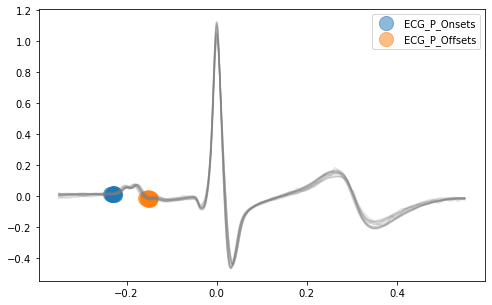

In [41]:
# Visualize P-wave boundaries
signal_dwt, waves_dwt = nk.ecg_delineate(ekg_signal, rpeaks, sampling_rate=3000, method="dwt", show=True, show_type='bounds_P')

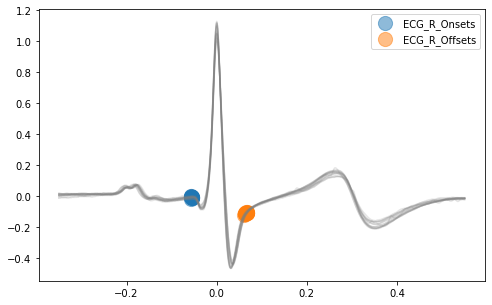

In [17]:
# Visualize R-wave boundaries
signal_dwt, waves_dwt = nk.ecg_delineate(ekg_signal, rpeaks, sampling_rate=3000, method="dwt", show=True, show_type='bounds_R')

# Creating Epochs

In [18]:
# Load packages
import neurokit2 as nk
import matplotlib.pyplot as plt

In [30]:
plt.rcParams['figure.figsize'] = [15, 5]  # Bigger images

# Load ECG data from data folder (sampling rate= 1000 Hz)
data = nk.data("bio_eventrelated_100hz")

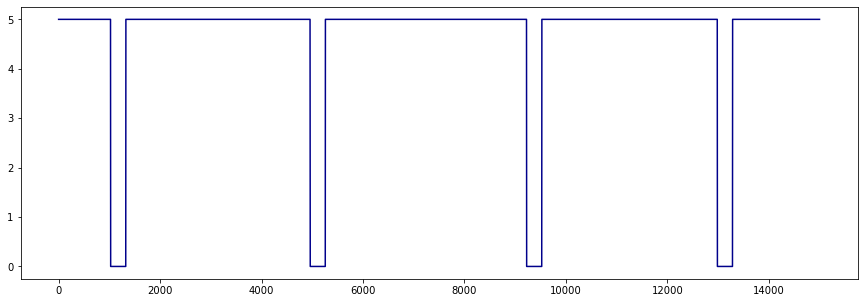

In [33]:
# Visualize the event-marking channel
plt.plot(data['Photosensor'], color = 'darkblue')
condition_list = ["Negative", "Neutral", "Neutral", "Negative"]

In [39]:
# Find events
events = nk.events_find(event_channel=data["Photosensor"],
                        threshold_keep='below',
                        event_conditions=condition_list)

events

{'onset': array([ 1024,  4957,  9224, 12984]),
 'duration': array([300, 300, 300, 300]),
 'label': array(['1', '2', '3', '4'], dtype='<U11'),
 'condition': ['Negative', 'Neutral', 'Neutral', 'Negative']}

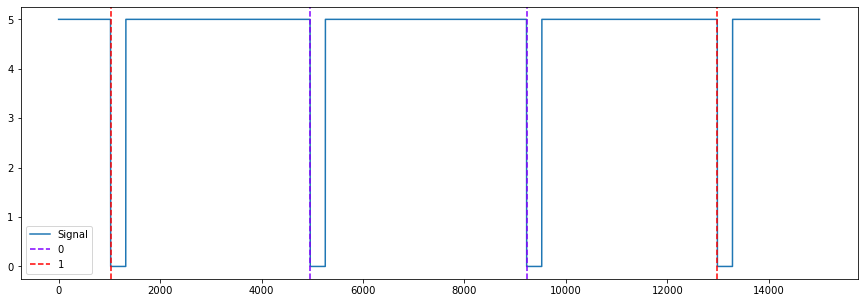

In [37]:
plot = nk.events_plot(events, data['Photosensor'])

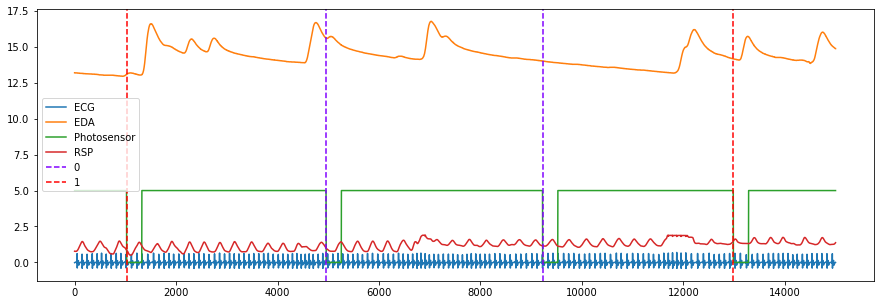

In [38]:
plot = nk.events_plot(events, data)

In [43]:
#1. Epochs to start *1 second before the event onset*

#2. Epochs to end *6 seconds* afterwards

# Build and plot epoch
# Process the signal
df, info = nk.bio_process(ecg=data["ECG"], rsp=data["RSP"], eda=data["EDA"], sampling_rate=100)
epochs = nk.epochs_create(df, events, sampling_rate=100, epochs_start=-1, epochs_end=6)

In [47]:
df

,ECG_Raw,ECG_Clean,ECG_Rate,ECG_Quality,ECG_R_Peaks,ECG_P_Peaks,ECG_P_Onsets,ECG_P_Offsets,ECG_Q_Peaks,ECG_R_Onsets,...,EDA_Phasic,SCR_Onsets,SCR_Peaks,SCR_Height,SCR_Amplitude,SCR_RiseTime,SCR_Recovery,SCR_RecoveryTime,RSA_P2T,RSA_Gates
0,-0.015869,0.001499,60.858467,0.618631,0,0,0,0,0,0,...,0.094612,0,0,0.0,0.0,0.0,0,0.0,0.09,8.372156
1,-0.011703,0.004621,60.858467,0.618631,0,0,0,0,0,0,...,0.093571,0,0,0.0,0.0,0.0,0,0.0,0.09,8.372156
2,-0.009766,0.005260,60.858467,0.618631,0,0,0,0,0,0,...,0.092546,0,0,0.0,0.0,0.0,0,0.0,0.09,8.372156
3,-0.013321,0.004423,60.858467,0.618631,0,0,0,0,0,0,...,0.091549,0,0,0.0,0.0,0.0,0,0.0,0.09,8.372156
4,-0.009583,0.005670,60.858467,0.618631,0,0,0,0,0,0,...,0.090593,0,0,0.0,0.0,0.0,0,0.0,0.09,8.372156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,-0.007675,0.011875,56.603774,0.378818,0,0,0,0,0,0,...,0.014949,0,0,0.0,0.0,0.0,0,0.0,0.04,8.741065
14996,-0.005203,0.011978,56.603774,0.378818,0,0,0,0,0,0,...,0.013793,0,0,0.0,0.0,0.0,0,0.0,0.04,8.741065
14997,-0.004272,0.012345,56.603774,0.378818,0,0,0,0,0,0,...,0.012826,0,0,0.0,0.0,0.0,0,0.0,0.04,8.741065
14998,-0.000458,0.012854,56.603774,0.378818,0,0,0,0,0,0,...,0.012049,0,0,0.0,0.0,0.0,0,0.0,0.04,8.741065


In [46]:
epochs

{'1':             ECG_Raw  ECG_Clean   ECG_Rate  ECG_Quality  ECG_R_Peaks  \
 -1.000000  0.041336   0.049079  66.369097     0.852755            0   
 -0.989986  0.042221   0.051574  66.323940     0.853032            0   
 -0.979971  0.048660   0.056594  66.275980     0.853309            0   
 -0.969957  0.054962   0.063871  66.225295     0.853588            0   
 -0.959943  0.065018   0.072078  66.171963     0.853866            0   
 ...             ...        ...        ...          ...          ...   
  5.959943 -0.002014   0.004758  55.887255     0.854255            0   
  5.969957  0.001297   0.006451  55.980611     0.856093            0   
  5.979971  0.002884   0.007675  56.073343     0.857909            0   
  5.989986  0.001297   0.007797  56.165370     0.859703            0   
  6.000000  0.003372   0.010030  56.256607     0.861475            0   
 
            ECG_P_Peaks  ECG_P_Onsets  ECG_P_Offsets  ECG_Q_Peaks  \
 -1.000000            0             0              0        